In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [4]:
df = pd.read_excel("Random_leak_data_by_python_new.xlsx")
df.head()

,Timestamp,Pressure,Temperature,Frequency,Amplitude,Latitude,Longitude,Leak Condition
0,2024-09-11 01:07:51.672,39.929400,10.621079,18424.053113,1.027891,22.903695,91.492707,0
1,2024-09-11 01:08:51.672,28.772791,12.583485,19349.045753,1.062183,23.669735,90.480759,0
2,2024-09-11 01:09:51.672,40.683585,10.373292,16836.128391,1.198044,22.882568,91.501099,0
3,2024-09-11 01:10:51.672,30.132450,7.311777,13157.137992,1.147510,23.649962,91.316517,1
4,2024-09-11 01:11:51.672,43.363561,22.374388,13531.753162,1.021209,23.724924,90.813242,0


In [6]:
df.shape    # 8 columns and 1000 rows

(1000, 8)

In [8]:
df.describe()

,Timestamp,Pressure,Temperature,Frequency,Amplitude,Latitude,Longitude,Leak Condition
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2024-09-11 09:27:21.672000,32.279212,15.098940,16985.253316,0.999864,23.080595,91.076086,0.258000
min,2024-09-11 01:07:51.672000,20.002799,5.000084,12008.290348,0.800623,22.344266,90.400441,0.000000
25%,2024-09-11 05:17:36.672000,25.645795,10.018130,14561.355364,0.900608,22.748368,90.717697,0.000000
50%,2024-09-11 09:27:21.672000,31.921272,15.172110,16807.068037,0.998330,23.083174,91.064813,0.000000
75%,2024-09-11 13:37:06.672000,38.703124,19.982058,19426.435195,1.104858,23.424764,91.415869,1.000000
max,2024-09-11 17:46:51.672000,44.986369,24.997440,21993.122800,1.199776,23.777052,91.814580,1.000000
std,NaN,7.381763,5.756182,2891.156689,0.117223,0.401001,0.404323,0.437753


In [10]:
# Split the data into features (X) and target variable (y)

X = df.drop(columns=['Timestamp', 'Latitude', 'Longitude', 'Leak Condition'])
y = df['Leak Condition']

In [12]:
X.head()

,Pressure,Temperature,Frequency,Amplitude
0,39.929400,10.621079,18424.053113,1.027891
1,28.772791,12.583485,19349.045753,1.062183
2,40.683585,10.373292,16836.128391,1.198044
3,30.132450,7.311777,13157.137992,1.147510
4,43.363561,22.374388,13531.753162,1.021209


In [14]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Leak Condition, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  

# Importing train_test_split function from sklearn library
# Splitting the dataset into training and testing sets with 80% for training and 20% for testing

In [18]:
X_train.shape

(800, 4)

In [20]:
X_test.shape

(200, 4)

In [22]:
from sklearn.preprocessing import MinMaxScaler                    # Importing MinMaxScaler from sklearn.preprocessing
scaler = MinMaxScaler()                                           # Initializing MinMaxScaler object
X_train_scaled = scaler.fit_transform(X_train)                    # Scaling the training features using Min-Max scaling
X_test_scaled = scaler.fit_transform(X_test)                      # Scaling the testing features using Min-Max scaling

In [24]:
X_train_scaled

array([[0.86644992, 0.4360012 , 0.18844217, 0.59121496],
       [0.84313926, 0.09260726, 0.65462262, 0.0623835 ],
       [0.63440473, 0.68328105, 0.71504437, 0.13877925],
       ...,
       [0.39827878, 0.62740301, 0.87364972, 0.44882977],
       [0.46059965, 0.58472611, 0.28863769, 0.12982962],
       [0.00220662, 0.44523584, 0.60390752, 0.60050745]])

In [26]:
from keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [28]:
model = Sequential()
model.add(Dense(3, activation= 'sigmoid', input_dim = 4))
model.add(Dense(1, activation ='sigmoid'))

C:\Users\Apu Das\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam')

In [34]:
history= model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6938
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6759 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6655 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6525 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6391
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6176  
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6151 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6018 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6050 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5834 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5975 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5690 
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5739 
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 0.5685
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - los

In [36]:
history.history

{'loss': [0.6892032027244568,
  0.6696471571922302,
  0.6525330543518066,
  0.6389022469520569,
  0.6272586584091187,
  0.6178866028785706,
  0.6097346544265747,
  0.603258490562439,
  0.5976857542991638,
  0.593487024307251,
  0.5893241167068481,
  0.5863705277442932,
  0.5834829211235046,
  0.5810467004776001,
  0.5790231823921204,
  0.5773395299911499,
  0.5755962133407593,
  0.5741031765937805,
  0.5729257464408875,
  0.5714880228042603,
  0.5703327655792236,
  0.5691580176353455,
  0.5680915713310242,
  0.5670386552810669,
  0.5660145282745361,
  0.5650225877761841,
  0.5639009475708008,
  0.5628932118415833,
  0.5618976354598999,
  0.5608677268028259,
  0.5598594546318054,
  0.5588289499282837,
  0.557803750038147,
  0.5567470788955688,
  0.555750846862793,
  0.5546827912330627,
  0.5536084771156311,
  0.5525367856025696,
  0.5516538619995117,
  0.550383448600769,
  0.5492876768112183,
  0.5482021570205688,
  0.5470824241638184,
  0.5459809899330139,
  0.5448271632194519,
  0.543

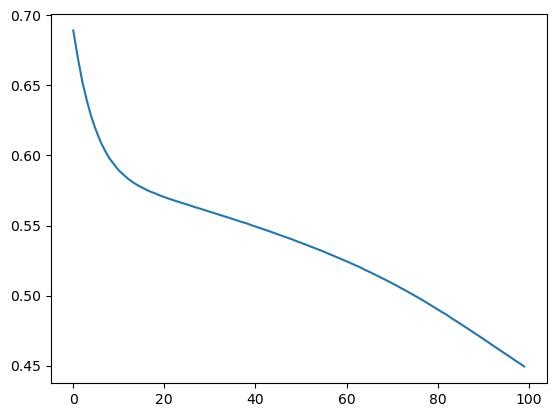

In [38]:
plt.plot(history.history['loss'])

In [40]:
model.layers[0].get_weights()

[array([[-1.2446233 ,  1.3400669 , -1.8512702 ],
        [-0.53871185,  1.7510175 , -0.8580981 ],
        [-0.10328452, -1.0248239 ,  0.57083505],
        [ 1.3622472 , -1.3207543 ,  1.1104769 ]], dtype=float32),
 array([-0.18894836,  0.05821127,  0.00314605], dtype=float32)]

In [42]:
y_log = model.predict(X_test_scaled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [44]:
y_pred = np.where(y_log>0.5,1,0)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.78

# Accuracy is 78%

# Improving Accuracy

In [50]:
model = Sequential()

model.add(Dense(11, activation= 'relu', input_dim = 4))
model.add(Dense(11, activation= 'relu'))
model.add(Dense(1, activation ='sigmoid'))

# changing dense from 3 to 11
# changing activation function to relu

C:\Users\Apu Das\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199 (796.00 B)

 Trainable params: 199 (796.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=1000, validation_split = 0.2)

Epoch 1/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5605 - loss: 0.6858 - val_accuracy: 0.7500 - val_loss: 0.6458
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7425 - loss: 0.6354 - val_accuracy: 0.7563 - val_loss: 0.6040
Epoch 3/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6993 - loss: 0.6173 - val_accuracy: 0.7563 - val_loss: 0.5716
Epoch 4/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7415 - loss: 0.5683 - val_accuracy: 0.7563 - val_loss: 0.5413
Epoch 5/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7501 - loss: 0.5333 - val_accuracy: 0.7563 - val_loss: 0.5136
Epoch 6/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7504 - loss: 0.5087 - val_accuracy: 0.7563 - val_loss: 0.4890
Epoch 7/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7428 - loss: 0.4905 - val_accuracy: 0.7563 - val_loss: 0.4659
Epoch 8/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7401 - loss: 0.4724 - val_accuracy: 0

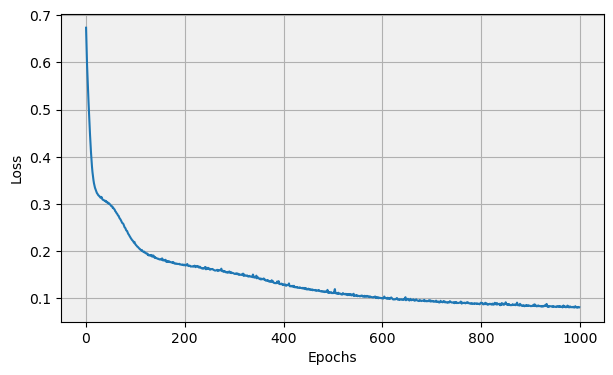

In [56]:
plt.figure(figsize=(7, 4))                   # Setting the size of the figure to 5x3
plt.plot(history.history['loss'])            # Plotting the training loss over epochs
plt.xlabel('Epochs')                         # Labeling the x-axis as "Epochs"
plt.ylabel('Loss')                           # Labeling the y-axis as "Loss"
plt.gca().set_facecolor('#f0f0f0')           # Setting background color to light gray
plt.grid(True)                               # Displaying grid lines

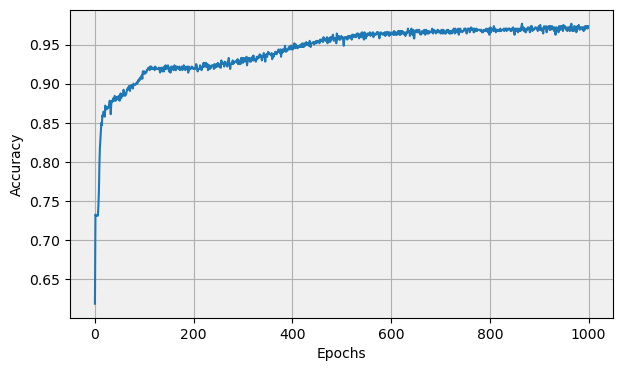

In [58]:

plt.figure(figsize=(7, 4))                      # Setting the size of the figure to 5x3
plt.plot(history.history['accuracy'])           # Plotting the training loss over epochs
plt.xlabel('Epochs')                            # Labeling the x-axis as "Epochs"
plt.ylabel('Accuracy')                          # Labeling the y-axis as "Accuracy"

plt.gca().set_facecolor('#f0f0f0')              # Setting background color to light gray
plt.grid(True)                                  # Displaying grid lines

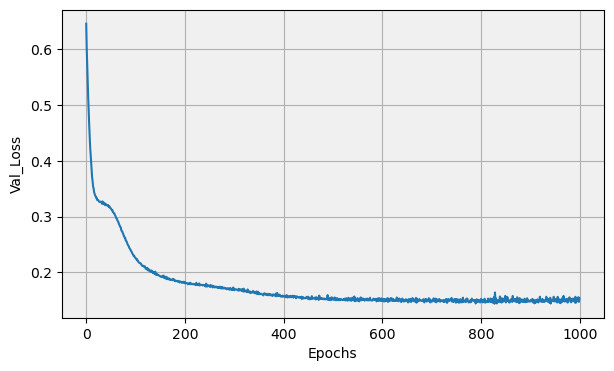

In [60]:
plt.figure(figsize=(7, 4))                   # Setting the size of the figure to 5x3
plt.plot(history.history['val_loss'])        # Plotting the training loss over epochs
plt.xlabel('Epochs')                         # Labeling the x-axis as "Epochs"
plt.ylabel('Val_Loss')                       # Labeling the y-axis as "Val_Loss"
plt.gca().set_facecolor('#f0f0f0')           # Setting background color to light gray
plt.grid(True)                               # Displaying grid lines

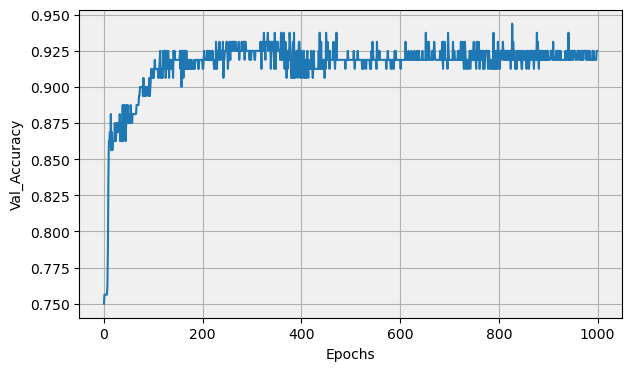

In [62]:
plt.figure(figsize=(7, 4))                   # Setting the size of the figure to 5x3
plt.plot(history.history['val_accuracy'])    # Plotting the training loss over epochs
plt.xlabel('Epochs')                         # Labeling the x-axis as "Epochs"
plt.ylabel('Val_Accuracy')                   # Labeling the y-axis as "Val_Accuracy"
plt.gca().set_facecolor('#f0f0f0')           # Setting background color to light gray
plt.grid(True)                               # Displaying grid lines

In [64]:
model.layers[0].get_weights()

[array([[ 1.7693994 ,  1.2753189 ,  0.8747613 ,  1.2081056 ,  0.80540913,
          0.15428989, -0.370142  , -0.08404911, -0.24772216,  0.05905392,
         -0.36398575],
        [-0.5806274 , -1.2320832 ,  0.6915419 ,  0.15123506, -0.7981278 ,
          1.8284032 ,  1.7810884 ,  0.00999719, -0.28595716, -0.05022843,
          0.77846354],
        [-0.10919573,  0.40521154, -0.1845491 , -0.54853886,  0.9622965 ,
         -0.08938151,  0.81027514, -0.6087574 , -1.0109949 ,  0.04795858,
          1.164918  ],
        [ 0.4681101 , -0.31180155,  0.27855688,  0.10647544, -0.81554633,
          0.0824228 ,  0.3485052 , -0.02757829,  1.0613948 , -1.4041276 ,
          0.34570998]], dtype=float32),
 array([ 0.3820286 ,  0.01107036, -0.12654689,  0.47134048,  0.3204728 ,
         0.14715035, -0.49053833,  0.        ,  0.5015802 ,  0.7983319 ,
         0.24957603], dtype=float32)]

In [66]:
model.layers[1].get_weights()

[array([[ 3.95650864e-01,  6.38253927e-01, -2.38082576e+00,
         -1.42178440e+00,  2.27544323e-01, -3.24236095e-01,
          5.78024268e-01,  1.38767779e-01,  6.15411639e-01,
          1.12681553e-01, -2.80795574e-01],
        [ 1.21302046e-01, -3.70672345e-01, -2.94082284e+00,
          1.76490247e+00,  1.34779620e+00,  7.19064653e-01,
         -2.67877460e-01,  3.83195430e-01, -1.01464045e+00,
          1.98839217e-01,  1.18347538e+00],
        [-8.76994312e-01,  4.22480136e-01,  4.76593301e-02,
         -2.79275566e-01,  2.97697932e-01, -7.04424500e-01,
          1.04710840e-01,  9.12039205e-02,  6.79962695e-01,
         -9.04726624e-01, -6.53875232e-01],
        [ 9.14053768e-02,  1.09484768e+00, -1.12600756e+00,
         -1.25988269e+00,  4.86849755e-01, -2.58047789e-01,
          1.05106950e+00, -3.54227185e-01,  8.87733936e-01,
          4.58029121e-01, -7.09904134e-01],
        [ 5.99629469e-02, -1.24717069e+00, -3.09139550e-01,
          1.71455097e+00,  1.16721666e+00,  

In [68]:
model.layers[2].get_weights()

[array([[ 2.9008212],
        [-1.0192797],
        [ 2.5045042],
        [ 2.1822214],
        [ 1.7679259],
        [ 1.6707715],
        [-1.5460887],
        [ 3.5310106],
        [-1.3949101],
        [-2.8727329],
        [ 2.2167113]], dtype=float32),
 array([-0.21260677], dtype=float32)]

In [70]:
y_log = model.predict(X_test_scaled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [72]:
y_pred = np.where(y_log>0.5,1,0)

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.955

# Accuracy is 95.5%

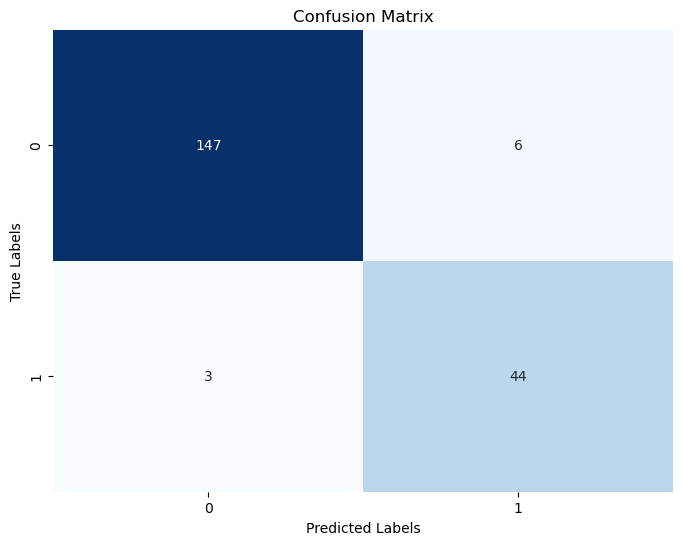

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
